In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import utils

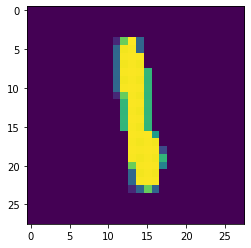

In [173]:
# load data
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

plt.imshow(xtrain[200])

In [160]:
print(xtrain.shape[1])
print(xtrain.shape[2])

28
28


In [161]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = xtrain.shape[1] * xtrain.shape[2]
# num_pixels = 28 * 28
print(num_pixels)
xtrain = xtrain.reshape((xtrain.shape[0], num_pixels)).astype('float32')
xtest = xtest.reshape((xtest.shape[0], num_pixels)).astype('float32')


784


TypeError: Invalid shape (784,) for image data

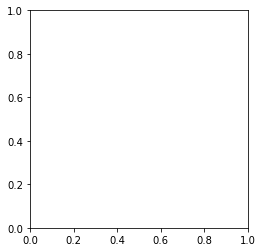

In [172]:
# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255
# one hot encode outputs
ytrain = utils.to_categorical(ytrain)
ytest = utils.to_categorical(ytest)
num_classes = ytest.shape[1]

In [146]:


# define baseline model
def baseline_model():
    # create model
    input_shape = (28,28)
    model = Sequential()
    model.add(Flatten(input_shape=(1, 28, 28, 1)))
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=20, batch_size=128, verbose=1)


Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2644 - accuracy: 0.9237 - val_loss: 0.1311 - val_accuracy: 0.9606
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1068 - accuracy: 0.9686 - val_loss: 0.0973 - val_accuracy: 0.9704
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0698 - accuracy: 0.9791 - val_loss: 0.0723 - val_accuracy: 0.9781
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.0672 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0220 - accuracy: 0.9937 - val_loss: 0.0599 - val_accuracy: 0.9825
Epoch 

In [147]:
# Final evaluation of the model
scores_train = model.evaluate(xtrain, ytrain, verbose=0)
print("Accuracy: %.2f%%" % (scores_train[1]*100))
scores_test = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores_test[1]*100))

Accuracy: 99.98%
Accuracy: 98.29%


In [148]:
model.save("FFNN2.h5")

In [32]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


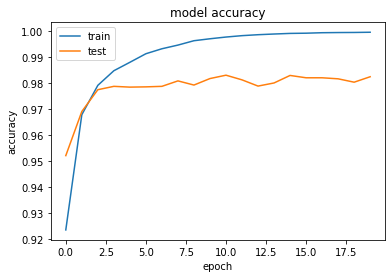

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

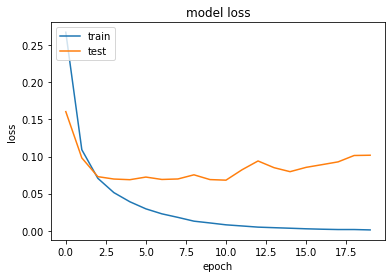

In [47]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
sq_pred_y = model.predict(xtest)

# This step will decode one_hot_encode and give prediction by digits
sq_pred_y = np.argmax(sq_pred_y,axis=1)
sq_pred_y = pd.DataFrame(sq_pred_y,columns=["Label"])

# Index column to start from 1
sq_pred_y.index = np.arange(1, len(sq_pred_y)+1)
# Assign Index column name
sq_pred_y.index.name = "ImageID"

In [60]:
sq_pred_y.head(10)

,Label
ImageID,
1,7
2,2
3,1
4,0
5,4
6,1
7,4
8,9
9,5


In [61]:
# Getting model prediction into csv file
sq_pred_y.to_csv('sq_pred.csv')

# Convolutional Neural Network

In [68]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from tensorflow.keras import utils

In [66]:
#Since convolutional neural network takes images in 2D channels form. So need to reshape train data again
#Train Data reshaping for CNN
# load data
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [69]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [70]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
model = baseline_model()

In [105]:
# Larger CNN for the MNIST Dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils

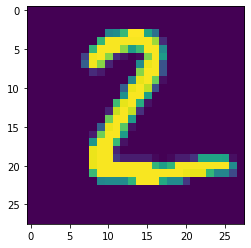

In [125]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()



plt.imshow(X_test[1])

In [133]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [108]:
# define the larger model
def larger_model():
	# create model
	cnn_model = Sequential()
	cnn_model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	cnn_model.add(MaxPooling2D())
	cnn_model.add(Conv2D(15, (3, 3), activation='relu'))
	cnn_model.add(MaxPooling2D())
	cnn_model.add(Dropout(0.2))
	cnn_model.add(Flatten())
	cnn_model.add(Dense(128, activation='relu'))
	cnn_model.add(Dense(50, activation='relu'))
	cnn_model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return cnn_model

In [109]:

# build the model
cnn_model = larger_model()
# Fit the model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3945 - accuracy: 0.8766 - val_loss: 0.1040 - val_accuracy: 0.9712
Epoch 2/10
300/300 [==============================] - 14s 46ms/step - loss: 0.1033 - accuracy: 0.9690 - val_loss: 0.0506 - val_accuracy: 0.9837
Epoch 3/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 4/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0575 - accuracy: 0.9823 - val_loss: 0.0385 - val_accuracy: 0.9881
Epoch 5/10
300/300 [==============================] - 14s 48ms/step - loss: 0.0511 - accuracy: 0.9837 - val_loss: 0.0341 - val_accuracy: 0.9886
Epoch 6/10
300/300 [==============================] - 15s 49ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0300 - val_accuracy: 0.9906
Epoch 7/10
300/300 [==============================] - 16s 52ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0277 - val_accuracy:

In [110]:
scores_train = cnn_model.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores_train[1]*100))
scores_test = cnn_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores_test[1]*100))

Accuracy: 99.53%
Accuracy: 99.08%


In [80]:
# list all data in history
print(cnn_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


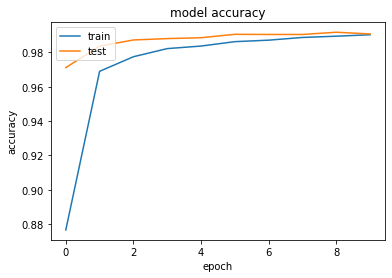

In [111]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

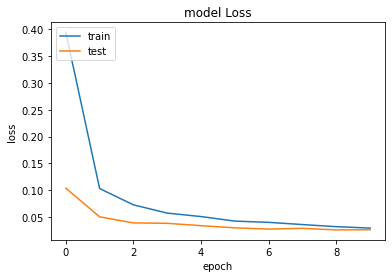

In [112]:

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [91]:
cnn_model.save("CNN_MNIST.h5")

In [113]:
cnn_pred_y = model.predict(X_test)

# This step will decode one_hot_encode and give prediction by digits
cnn_pred_y = np.argmax(cnn_pred_y,axis=1)
cnn_pred_y = pd.DataFrame(cnn_pred_y,columns=["Label"])

# Index column to start from 1
cnn_pred_y.index = np.arange(1, len(cnn_pred_y)+1)
# Assign Index column name
cnn_pred_y.index.name = "ImageID"

In [154]:
cnn_pred_y.head()

,Label
ImageID,
1,7
2,2
3,1
4,0
5,4


# Prediction with Image


In [157]:
X_test[1].shape

(28, 28, 1)

In [ ]:
# predict the class

digit = model.predict_classes(img)